Uma ONG de animais deseja incentivar a adoção de pets através de uma campanha publicitária em vídeo. A equipe de comunicação da ONG quer entender qual animal pode gerar maior interesse em adoção, gato ou cachorro. 

Para isso, foi desenvolvido um teste A/B. Um  grupo de pessoas assistiu ao vídeo com um cachorro e o outro grupo, com um gato. Logo após, foi questionada a probabilidade da pessoa adotar um animal.

As pessoas desse experimento foram expostas a apenas um dos vídeos, as amostras são aleatórias e sem vieses sistemáticos.

In [1]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#ler o arquivo 
df = pd.read_csv("cachorro_gato.csv")
df

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375
...,...,...,...
495,495,0,70.292458
496,496,0,74.674293
497,497,1,43.148814
498,498,0,58.625388


Análise descritiva da base de dados.
*   A coluna grupo identifica o animal do vídeo, 0 para cachorro e 1 para gato.
*   Escore é a coluna com a probabilidade da pessoa adotar um animal após ver o vídeo.

In [36]:
#análise descritiva da coluna escore agrupando por 0 e 1
df.groupby('grupo')["escore"].describe()

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
0,253.0,55.531922,14.665402,16.304739,44.488055,55.802372,66.249013,95.309459
1,247.0,56.744495,14.913287,14.654955,48.682432,56.924405,66.817326,93.259671


As médias e as medianas das amostras são próximas. Para analisar visualmente, vamos verificar a distribuição de cada grupo.

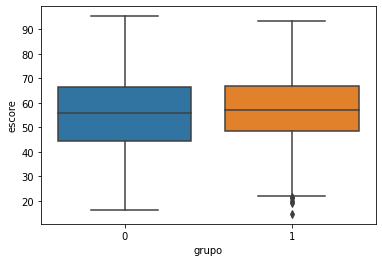

In [23]:
# Boxplot agrupado por 0  para cachorro e 1 para gato
sns.boxplot(x='grupo', y='escore', data=df)

Os boxplots estão sobrepostos, o que leva a crer que os grupos são semelhantes.
Para validar, vamos ao teste de hipótese.

**Teste de hipótese**

Por se tratar de um teste de hipótese para médias, com duas amostras independentes e desvio padrão populacional desconhecido, será utilizado o teste t com as seguintes hipóteses.

H0: média do grupo cachorro é igual a média do grupo gato.
Ha: média do grupo cachorro é diferente a média do grupo gato.

Nível de significância (α): 0,05.



In [30]:
#importar função do teste-t para amostras independentes
from scipy.stats import ttest_ind

In [33]:
ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

Ttest_indResult(statistic=-0.9166663411409343, pvalue=0.35976119585131083)

In [34]:
t, pvalue = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])
print('stat=%.3f, p=%.3f' % (t, pvalue))

stat=-0.917, p=0.360


O p-valor é, aproximadamente, 0,36. Como o p-valor é maior que o nível de significância (0,05), não rejeitamos a hipótese nula.
Ou seja, ao nível de confiância a 95%, é possível afirmar que as médias dos dois grupos são estatisticamente iguais.
